In [43]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [44]:
# importing data
df = pd.read_pickle(r"C:\Users\Windows\Instacart Basket Analysis\02 Data\Prepared Data\df_small_updated.pkl")

In [45]:
# df.info()

In [46]:
path = r'C:\Users\Windows\Instacart Basket Analysis'

In [47]:
#What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
# Task 4.9 - count of customers in each category (loyal, regular, new) - step 4 


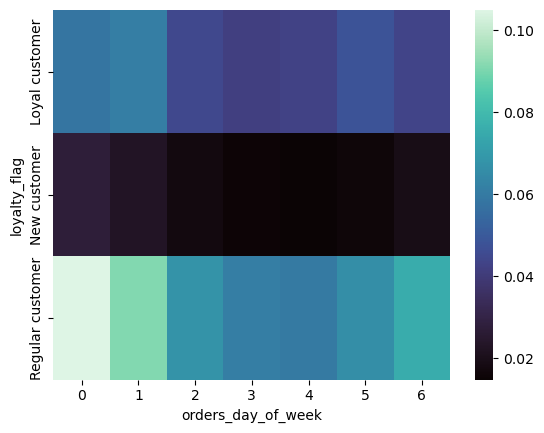

In [48]:
#Are there differences in ordering habits based on a customer’s loyalty status?
ct_1 = pd.crosstab(df['loyalty_flag'], df['orders_day_of_week'], normalize = True)
loyalty_order_day= sns.heatmap(ct_1, cmap="mako")
loyalty_order_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_order_day.png'))

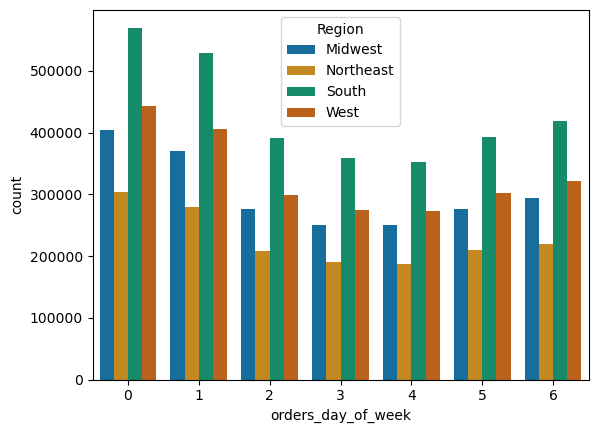

In [49]:
# Are there differences in ordering habits based on a customer’s region?

region_order_day = sns.countplot(data = df,  x='orders_day_of_week', hue ='Region', palette ='colorblind')
region_order_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_order_day.png'))


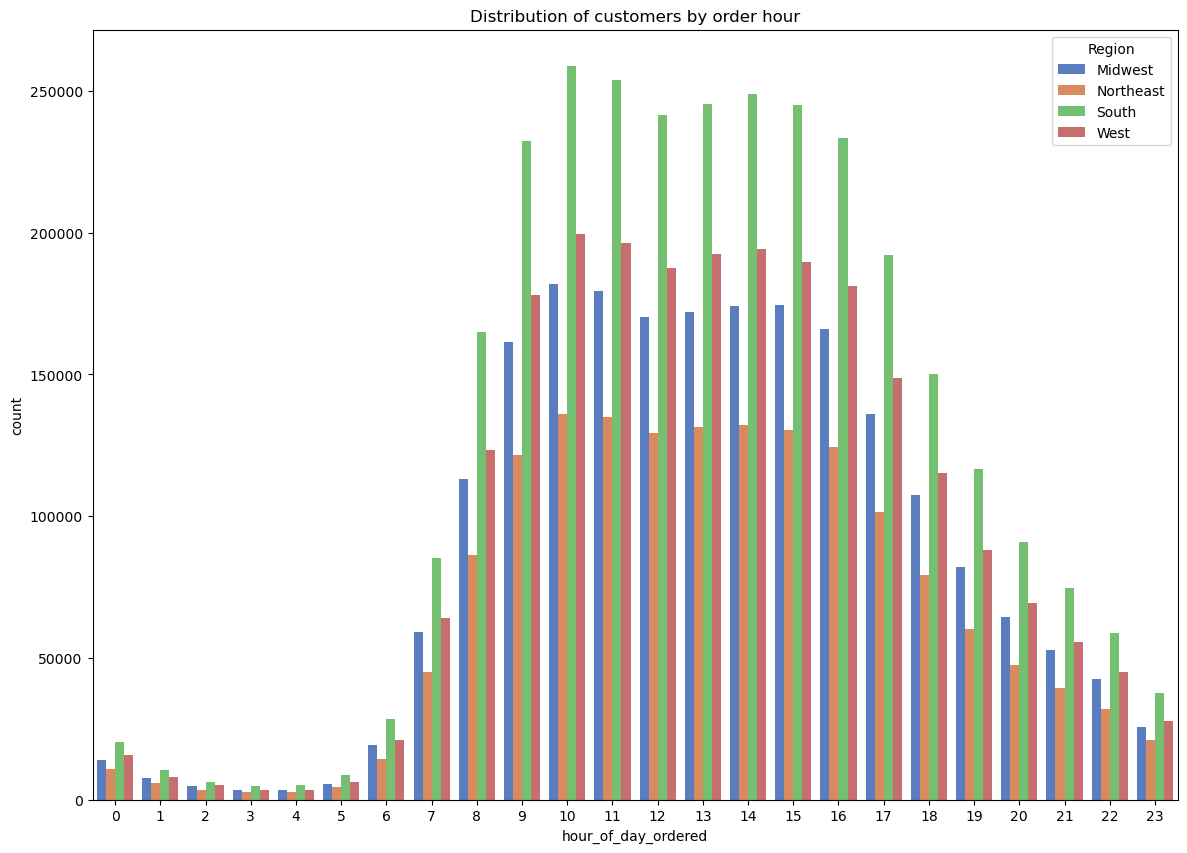

In [50]:
plt.figure(figsize=(14, 10))
region_order_hour = sns.countplot(data = df, x='hour_of_day_ordered', hue='Region',palette ='muted')
plt.title ('Distribution of customers by order hour')
region_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_order_hour.png'))


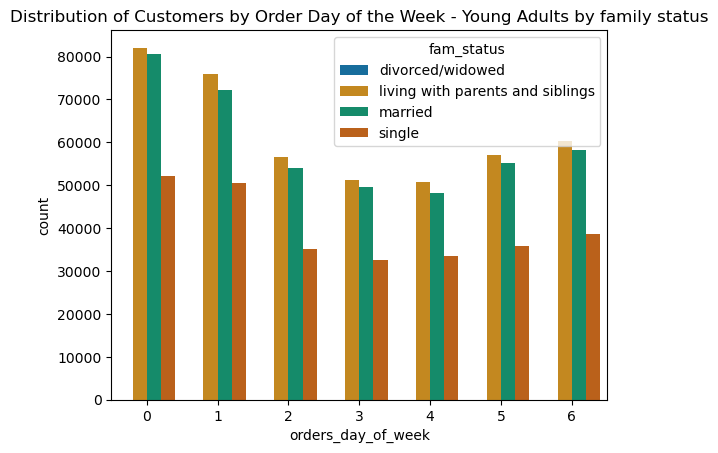

In [51]:
# Connection between Age and FAmily Status in terms of ordering status
# Young Adult and Family Status 
df_1 = df[df['age_group'] == 'Young Adult']
young_adult_fam_order_day =sns.countplot(data = df_1,  x='orders_day_of_week', hue = 'fam_status', palette ='colorblind')
plt.title('Distribution of Customers by Order Day of the Week - Young Adults by family status')
young_adult_fam_order_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','young_adult_fam_order_day.png'))

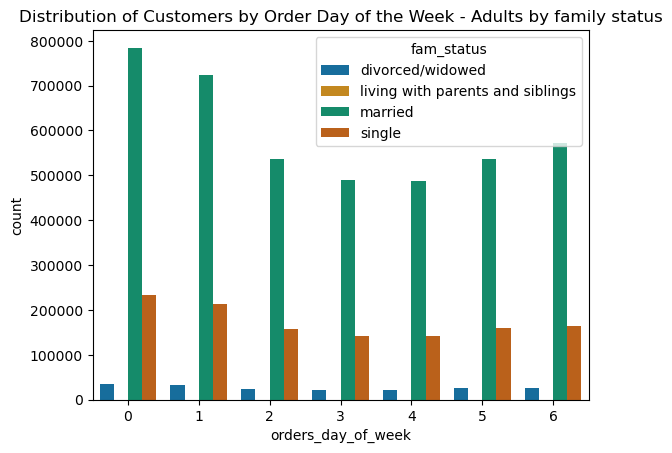

In [52]:
# Connection between Age and FAmily Status in terms of ordering habits 
# Adult and Family Status 
df_2 = df[df['age_group'] == 'Adult']
adult_fam_order_day =sns.countplot(data = df_2,  x='orders_day_of_week', hue = 'fam_status', palette ='colorblind')
plt.title('Distribution of Customers by Order Day of the Week - Adults by family status')
adult_fam_order_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','adult_fam_order_day.png'))

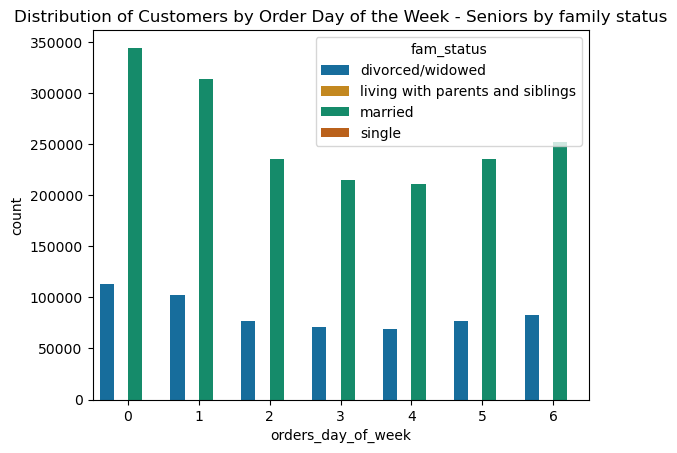

In [53]:
# Connection between Age and Family Status in terms of ordering habits
# Senior and Family Status 
df_3 = df[df['age_group'] == 'Senior']
senior_fam_order_day =sns.countplot(data = df_3,  x='orders_day_of_week', hue = 'fam_status', palette ='colorblind')
plt.title('Distribution of Customers by Order Day of the Week - Seniors by family status')
senior_fam_order_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','senior_fam_order_day.png'))

##  What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?


### To answer this question, we need to look at how each variable affects the ordering habits such as the prices of orders and the frequency of orders.  

### 1)  By income group, the high-income groups across all 4 regions, on average, have more expensive orders than either the middle income or low income group. 

### 2)  By age group, we found out that all 3 age groups hover around the same average price with seniors averaging slightly lower than either the adults or young adults. However, one exception is the young adults in the Midwest,who avererage at a much higher price than the average for young adults across all 4 regions.

### 3) By family status, we found out that the singles in Midwest and the divorced in the Northeast have more than average spending. 

### 4) By dependant status, 2-child families in the Midwest have the highest average expenditure compared to customers with no dependants.

###  5) Married customer constitute the bulk of the frequent customers 

### 6) By age group, we also know that adults constitute the highest proportion of customers.



  

In [54]:
df['age_group'].value_counts(normalize=True)

age_group
Adult          0.610230
Senior         0.264931
Young Adult    0.124839
Name: proportion, dtype: float64

#### From this information,we need to find out the department and the top products ordered by the customer segments.
####  The department analysis is  contained in 4.10 Department Analysis

### Regional Spending

In [55]:
regional_total_spending= df.groupby('Region')['prices'].sum()

C:\Users\Windows\AppData\Local\Temp\ipykernel_2940\4235243658.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_total_spending= df.groupby('Region')['prices'].sum()


In [56]:
regional_total_spending_sorted = regional_total_spending.sort_values(ascending=False)

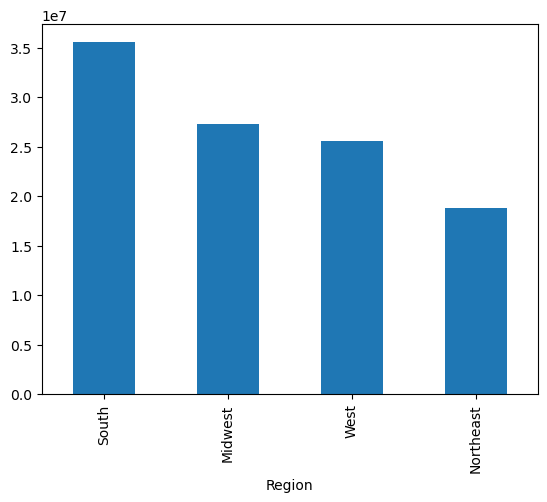

In [57]:
regional_spending_plot = regional_total_spending_sorted.plot.bar() 